# Optimization

In [1]:
from fyp_code import loukas_esn, optimize, utilities as util
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams['figure.dpi'] = 100

In [14]:
# initialise input data
data_mg = util.data_mg()
data_sin1 = util.data_sin(order=1)
data_sin2 = util.data_sin(order=2)
data_sin3 = util.data_sin(order=3)
# initialise parameter spaces
# mackey glass
rhos_mg = np.linspace(0.7,1.3,20)
betas_mg = np.logspace(-8,-3,20)
alphas_mg = np.linspace(0.2,0.9,20)
rho_mg = 1.1
beta_mg = 1e-6
alpha_mg = 0.7
# sin3
rhos_sin3 = np.linspace(0.7,1.6,20)
betas_sin3 = np.logspace(-8,-2,20)
alphas_sin3 = np.linspace(0.2,0.8,20)
rho_sin3 = 1.3
beta_sin3 = 1e-6
alpha_sin3 = 0.45
# other parameters
sparse_mg = 0.5
N_mg = 750

## Initial parameter spaces

20%
40%
60%
80%
100%
Optimal rho: 1.2684210526315791


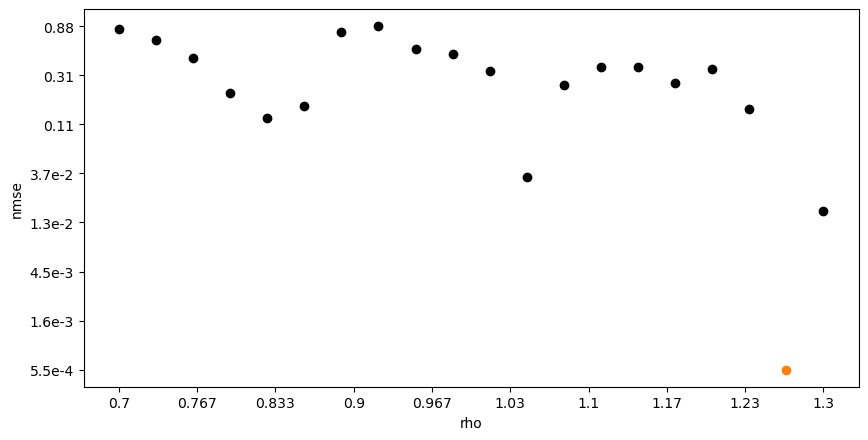

20%
40%
60%
80%
100%
Optimal beta: 2.335721469090121e-06


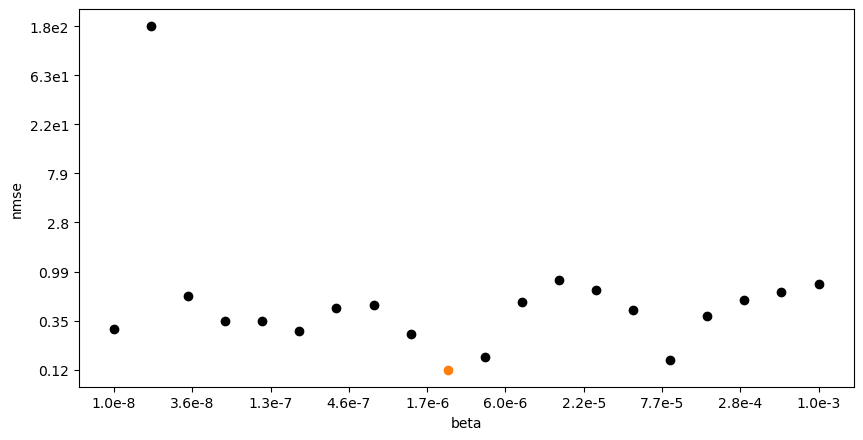

20%
40%
60%
80%
100%
Optimal alpha: 0.531578947368421


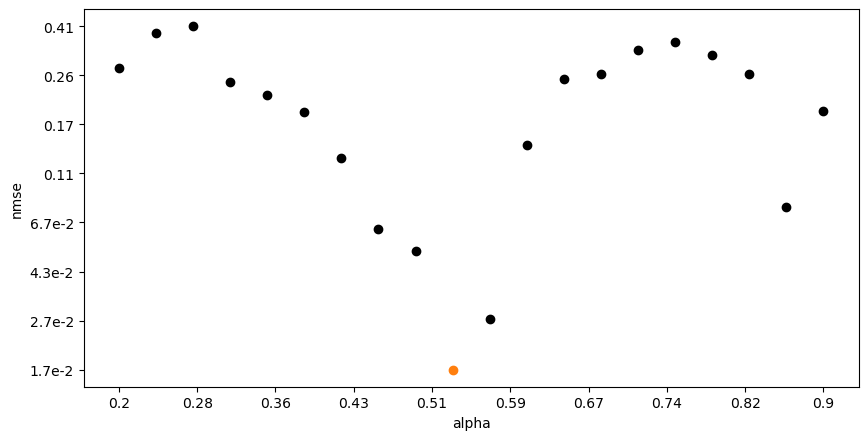

In [15]:
# Plotting the parameter spaces initialised at the top for mackey glass data
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, sparsity=sparse_mg, N=N_mg)
opt_mg.plot_rhos()
opt_mg.plot_betas()
opt_mg.plot_alphas()

## Recursion

### Individual parameter recursions

In [ ]:
# recursive rho sin3
opt_sin3 = optimize.Optimizer(data_sin3, rhos_sin3, betas_sin3, alphas_sin3, rhoscale=rho_sin3, beta=beta_sin3, alpha=alpha_sin3, N=1000)
opt_rec_sin3 = optimize.rho_recursive(opt_sin3,recursions=3, search_size=8)
print("rho opt: {}".format(opt_rec_sin3.get_rho()))
print("rhos opt: {}\n".format(opt_rec_sin3.get_betas()))
opt_rec_sin3.plot_rhos()

In [ ]:
# recursive beta sin3
opt_sin3 = optimize.Optimizer(data_sin3, rhos_sin3, betas_sin3, alphas_sin3, rhoscale=rho_sin3, beta=beta_sin3, alpha=alpha_sin3, N=1000)
opt_rec_sin3 = optimize.beta_recursive(opt_sin3,recursions=3, search_size=10)
print("beta opt: {}".format(opt_rec_sin3.get_beta()))
print("betas opt: {}\n".format(opt_rec_sin3.get_betas()))
opt_rec_sin3.plot_betas()

In [ ]:
# recursive alpha sin3
opt_sin3 = optimize.Optimizer(data_sin3, rhos_sin3, betas_sin3, alphas_sin3, rhoscale=rho_sin3, beta=beta_sin3, alpha=alpha_sin3, N=1000)
opt_rec_sin3 = optimize.alpha_recursive(opt_sin3,recursions=3, search_size=12)
print("alpha opt: {}".format(opt_rec_sin3.get_alpha()))
print("alphas opt: {}\n".format(opt_rec_sin3.get_betas()))
opt_rec_sin3.plot_alphas()

In [ ]:
# recursive rho mackey glass
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.rho_recursive(opt_mg,recursions=3,search_size=20)
print("rho opt: {}".format(opt_rec_mg.get_rho()))
print("rhos opt: {}\n".format(opt_rec_mg.get_rhos()))
opt_rec_mg.plot_rhos()

In [ ]:
# recursive beta mackey glass
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.beta_recursive(opt_mg,recursions=3,search_size=20)
print("beta opt: {}".format(opt_rec_mg.get_beta()))
print("betas opt: {}\n".format(opt_rec_mg.get_betas()))
opt_rec_mg.plot_betas()

In [ ]:
# recursive alpha mackey glass
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, N=1000)
opt_rec_mg = optimize.alpha_recursive(opt_mg,recursions=3,search_size=20)
print("alpha opt: {}".format(opt_rec_mg.get_alpha()))
print("alphas opt: {}\n".format(opt_rec_mg.get_alphas()))
opt_rec_mg.plot_alphas()

### Full recursive sequence

rho: 1.1
3 recursions left
RUNNING...

rho: 1.2684210526315791
2 recursions left
RUNNING...

rho: 1.2906432748538013
1 recursions left
RUNNING...

~ RHO RECURSION COMPLETED: rho = 1.4239766081871346 ~

alpha: 0.7
3 recursions left
RUNNING...

alpha: 0.7894736842105263
2 recursions left
RUNNING...

alpha: 0.852046783625731
1 recursions left
RUNNING...

~ ALPHA RECURSION COMPLETED: alpha = 0.8027290448343081 ~

beta: 1e-06
3 recursions left
RUNNING...

beta: 2.335721469090121e-06
2 recursions left
RUNNING...

beta: 3.5777190861430055e-06
1 recursions left
RUNNING...

~ BETA RECURSION COMPLETED: beta = 4.754042150170885e-06 ~

20%
40%
60%
80%
100%
Optimal rho: 1.4239766081871346


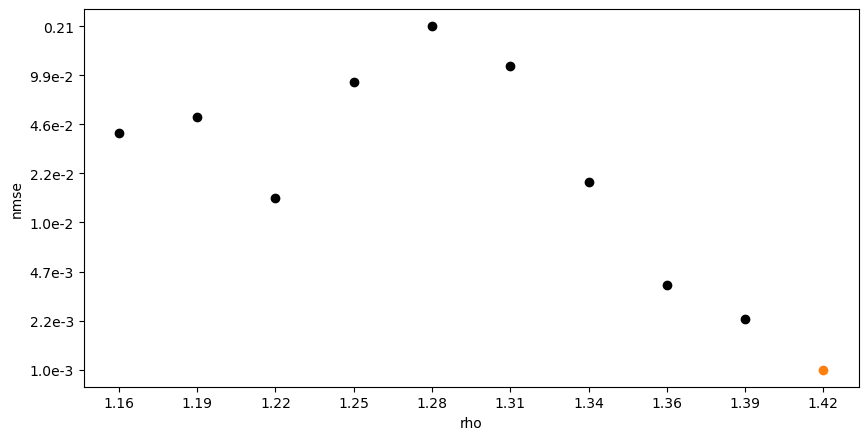

20%
40%
60%
80%
100%
Optimal alpha: 0.7040935672514621


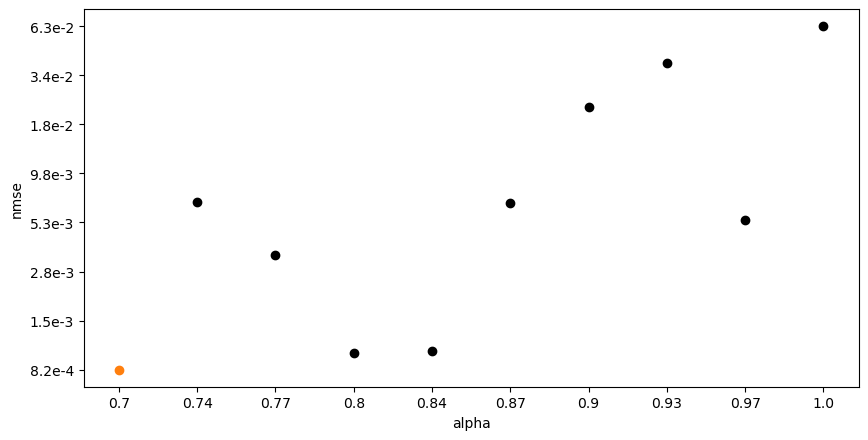

20%
40%
60%
80%
100%
Optimal beta: 4.754042150170885e-06


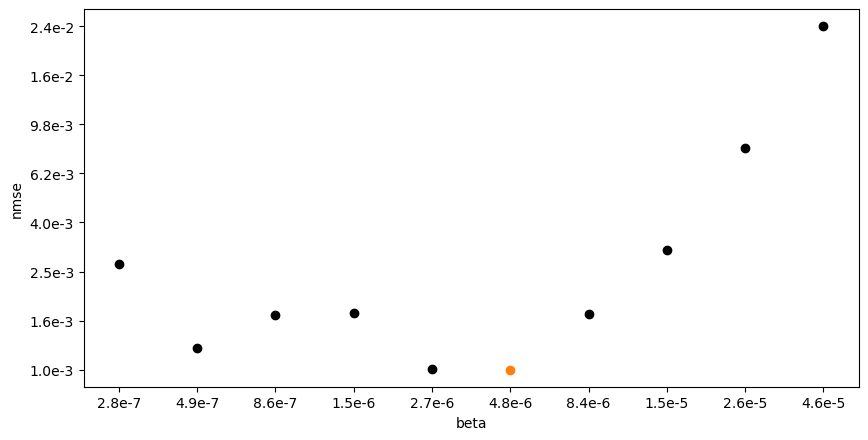

In [16]:
# full recursive optimization sequence
opt_mg = optimize.Optimizer(data_mg, rhos_mg, betas_mg, alphas_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, sparsity=sparse_mg, N=N_mg)
opt_rec_mg = optimize.full_recursive(opt_mg, recursions=3, search_size=10)
# plotting
opt_rec_mg.plot_rhos()
opt_rec_mg.plot_alphas()
opt_rec_mg.plot_betas()
# optimized parameter extraction
rho_rec_mg = opt_rec_mg.get_rho()
alpha_rec_mg = opt_rec_mg.get_alpha()
beta_rec_mg = opt_rec_mg.get_beta()

## Nested grid search

In [19]:
# nested grid-search
# takes forever (5-10 min) but gives good results
rho_g, beta_g, alpha_g, nmse_g = opt_rec_mg.rho_beta_alpha(prnt=True)

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
rho: 1.3350877192982458
beta: 8.636191963927803e-07
alpha: 0.8027290448343081
nmse: 0.00035756859371756285


## Optimization comparisons

nmse test: 0.7879425081969871


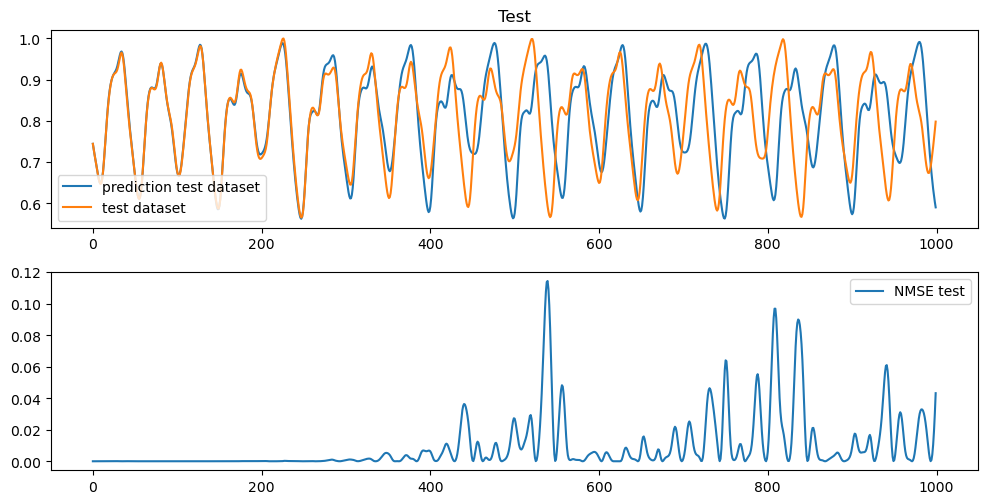

In [17]:
# using initial hand-estimated paramters
esn_mg = loukas_esn.Esn(data_mg, rhoscale=rho_mg, beta=beta_mg, alpha=alpha_mg, Ttrain=1000, Twashout=200, sparsity=sparse_mg, N=N_mg)
esn_mg.train()
#esn_mg.validate(val_time=1000)
esn_mg.test(test_time=1000)
print("nmse test: {}".format(esn_mg.nmse_test))
esn_mg.plot_test()

nmse test: 0.029104673203920295


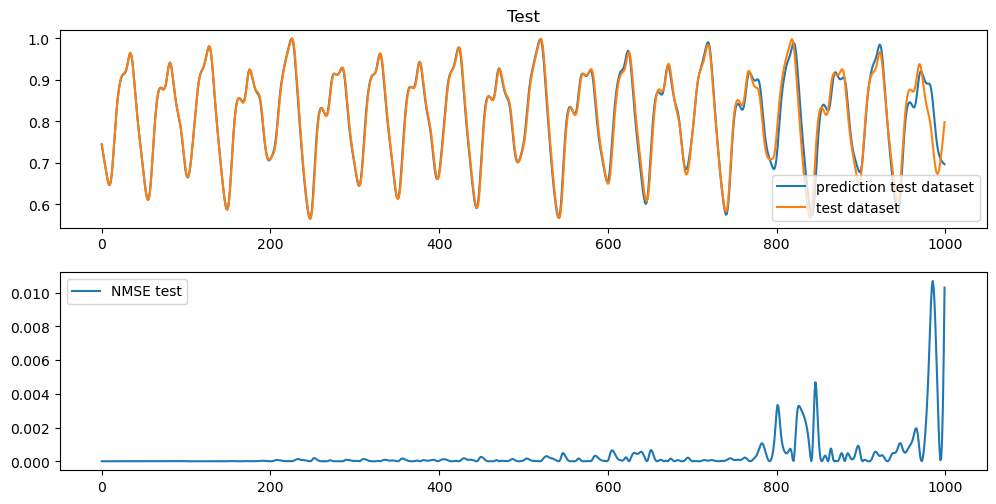

In [18]:
# using recursion-generated parameters
esn_mg = loukas_esn.Esn(data_mg, rhoscale=rho_rec_mg, beta=beta_rec_mg, alpha=alpha_rec_mg, Ttrain=1000, Twashout=200, sparsity=sparse_mg, N=N_mg)
esn_mg.train()
#esn_mg.validate(val_time=1000)
esn_mg.test(test_time=1000)
print("nmse test: {}".format(esn_mg.nmse_test))
esn_mg.plot_test()

nmse test: 0.010410332288213378


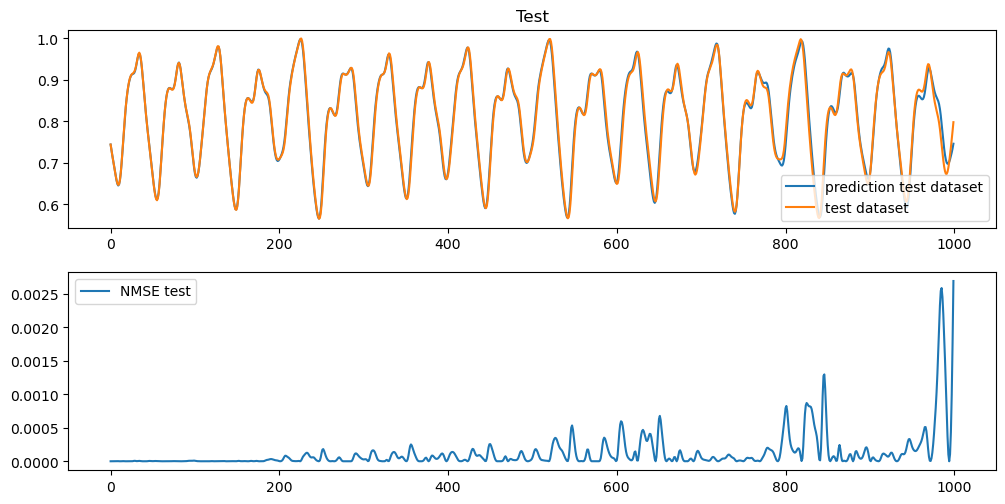

In [20]:
# using grid-searched-recursion parameters
esn_mg = loukas_esn.Esn(data_mg, rhoscale=rho_g, beta=beta_g, alpha=alpha_g, Ttrain=1000, Twashout=200, sparsity=sparse_mg, N=N_mg)
esn_mg.train()
#esn_mg.validate(val_time=1000)
esn_mg.test(test_time=1000)
print("nmse test: {}".format(esn_mg.nmse_test))
esn_mg.plot_test()